There are two major types of supervised machine learning problems, called classification and regression
 
 - in ```classification``` the goal is to predict a *class label*, which is a choice from a predefined list of posibilities
 - for ```regression``` tasks, the goal is to predict a continuous number, or a *floating-point numbet* in programming terms.

## Generalization, Overfitting, and Underfitting

If a model is able to make accurate pridictions on unseen data, we say it is able to *generalize* from the training set to the test set

Building a model that is too complex for the amount of
information we have, as our novice data scientist did, is called overfitting. Overfitting
occurs when you fit a model too closely to the particularities of the training set and
obtain a model that works well on the training set but is not able to generalize to new
data. On the other hand, if your model is too simple—say, “Everybody who owns a
house buys a boat”—then you might not be able to capture all the aspects of and vari‐
ability in the data, and your model will do badly even on the training set. Choosing
too simple a model is called underfitting.

In [1]:
import numpy as np
print("numpy version: {}".format(np.__version__))
import pandas as pd 
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import sklearn as sl
print("scikit-learn: {}".format(sl.__version__))
import mglearn

numpy version: 1.17.4
pandas version: 0.25.3
matplotlib version: 3.1.2
scikit-learn: 0.21.3


/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
X, y = mglearn.datasets.make_forge()

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


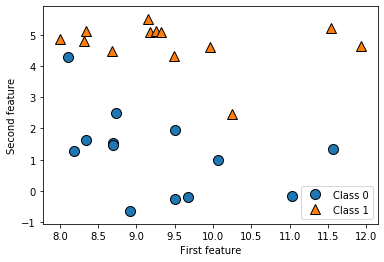

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [4]:
X[:5]

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977]])

In [5]:
y[:5]

array([1, 0, 1, 0, 0])

Text(0, 0.5, 'Target')

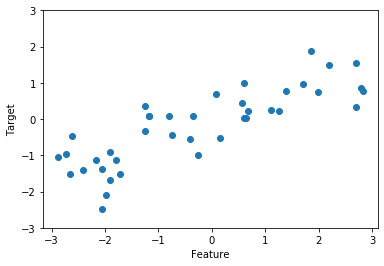

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [9]:
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [10]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [13]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### K-Nearest Neighbors

To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset - its "nearest neighbors"

#### k-Neabors classification

In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


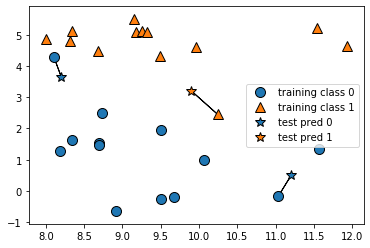

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

For each of new data points, we marked the closest point in the training set.

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


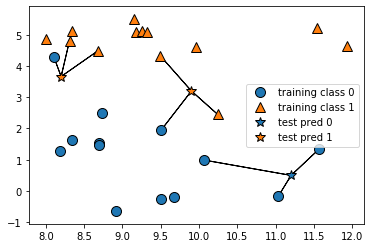

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [16]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [19]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
print("Test set predictions: \n{}\n{}".format(clf.predict(X_test), y_test))

Test set predictions: 
[1 0 1 0 1 0 0]
[1 0 1 0 1 1 0]


In [21]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


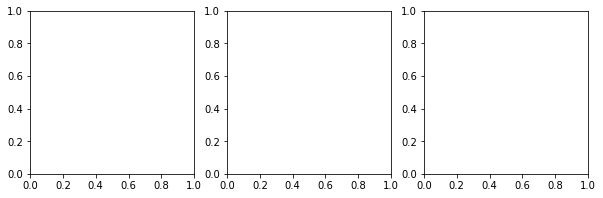

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3));

In [23]:
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

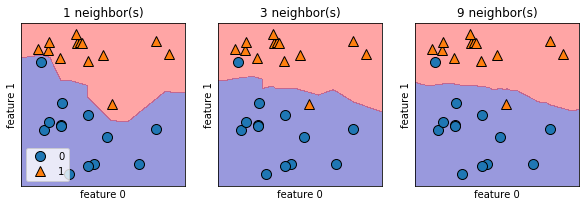

In [24]:
fig

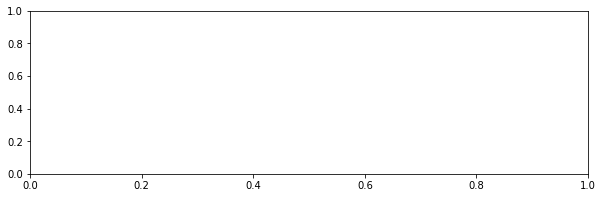

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(10, 3));

In [26]:
clf = KNeighborsClassifier(n_neighbors=26).fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=axes, alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)
ax.set_title("{} neighbor(s)".format(n_neighbors))
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
axes.legend(loc=3)

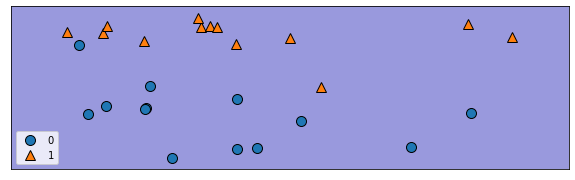

In [27]:
fig

In [28]:
clf = KNeighborsClassifier(n_neighbors=13).fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=axes, alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)
ax.set_title("{} neighbor(s)".format(n_neighbors))
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
axes.legend(loc=3)

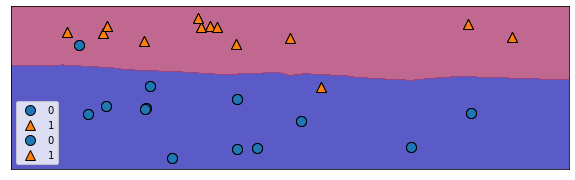

In [29]:
fig

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
cancer = load_breast_cancer()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [33]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

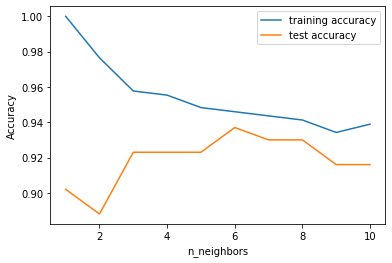

In [34]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### k-neighbors regression

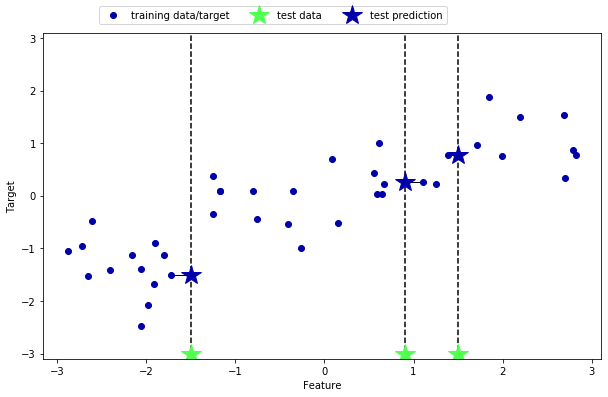

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

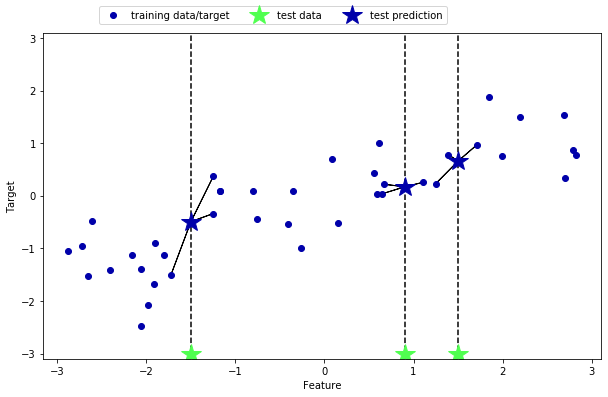

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
reg = KNeighborsRegressor(n_neighbors=3)

In [41]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [42]:
print("Test set pridictions:\n{}".format(reg.predict(X_test)))

Test set pridictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [43]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


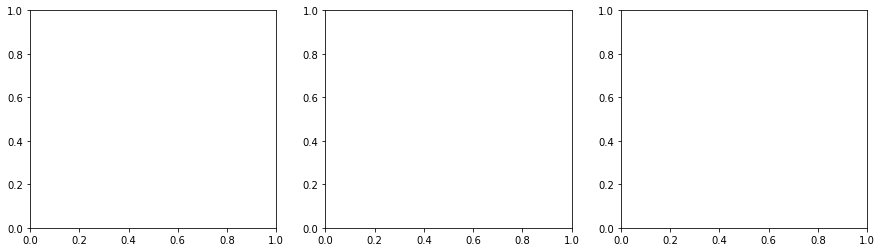

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

In [45]:
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neghbor(s)\n trian score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

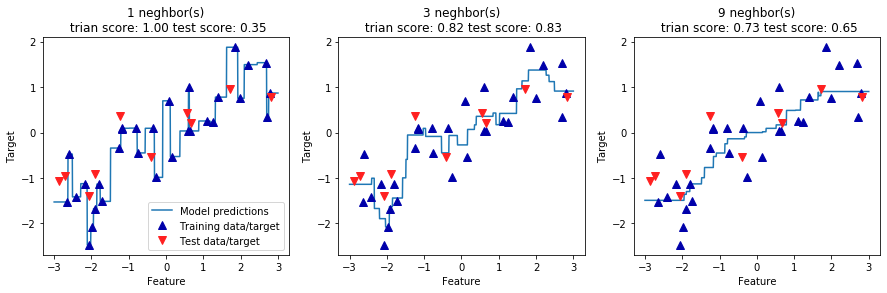

In [46]:
fig

There are two important parameters to the KNeighbors classifier:
 
 - the number of neghbors
 - measure distance between data points

 - One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments.
 - Building is usually very fast, but with large training set prediction can be slow

### Linear models

A class of models that are widely used in practice. Linear models make a prediction using a linear function of the input features.

#### Linear models for regression

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
x[i] - feature
w[i], b - parameters of the model that are learned
ŷ - the prediction the model makes

w[0]: 0.393906  b: -0.031804


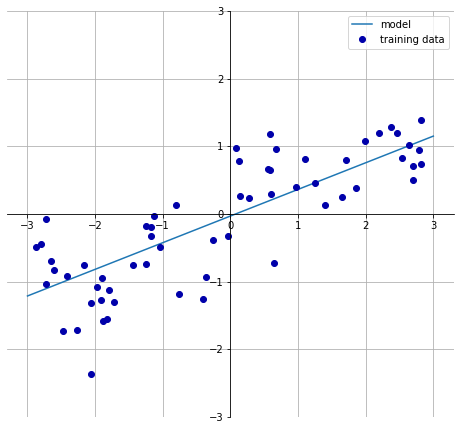

In [47]:
mglearn.plots.plot_linear_regression_wave()

For datasets with many features, linear models can be very powerful. In particular, if you have more features than training data points, any target y
can be perfectly modeled (on the training set) as a linear function

#### Linear regression (aka ordinary least squares)

Linear regreassion finds the parameters w and b that minimize the *mean squared error* between predictions and the true regression targets, y, on the training set.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
lr = LinearRegression().fit(X_train, y_train)

In [51]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [52]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [53]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [54]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear sign of overfitting. 

#### Ridge regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary leart squares. In ridge regression, though, the coefficients(w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint.
We want that some coefficients be close to 0, so they will have little effect on the outcome as possible. This is called *regularization*.
Regularization means  explicitly restricting a model to avoid overfitting.

In [55]:
from sklearn.linear_model import Ridge

In [56]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


```Ridge``` is a more restricted model, so we are less likely to overfit.

How much importance the model places on simplicity versus training set performance can be specified by the user, using the ```alpha``` parameter. 

In [57]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

In [58]:
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [59]:
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)

In [60]:
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


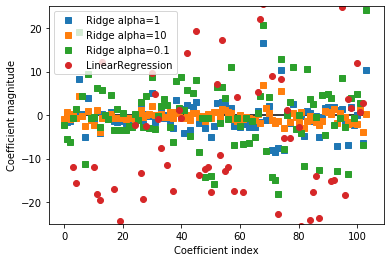

In [61]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

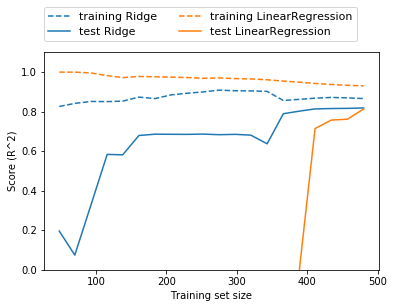

In [62]:
mglearn.plots.plot_ridge_n_samples()

#### Lasso

An alternative to ```Ridge``` for regularizing linear regression is ```Lasso```. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slighlty different way, called L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficints are exactly zero. 
Some features are entirely ignored by the model.

In [63]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


```Lasso``` does quite badly, both on the training and the test set. This indicates that we are underfitting

In [64]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower ```alpha``` allowed us to fit a more complex model , which worked better on the training and test data.

If we set ```alpha``` too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to ```LinearRegression```

In [65]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

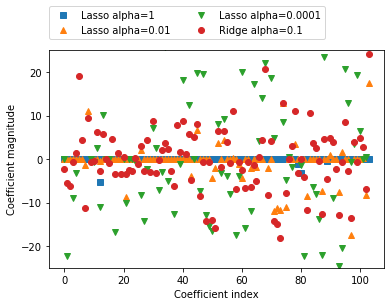

In [66]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

#### Linear models for classification

In this case, a prediction is made using the following formula:

```ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0```

For linear models for regression, the output ```ŷ```, is a linear function of the features: a line, plane, or hyperplane. 

For linear models for classification, the *decision boundary* is a linear function of the input.

There are many algorithms for learning linear models. These algorithms all differ in the following two ways:

- The way in which they measure how well a particular combination of coefficients and intercept fits the training data
- If and what kind of regularization they use

The two most common linear classification algorithms are *logistic regression*, implemented in ```linear_model.LogisticRegression```, and *linear support vector machines*(linear SVMs), implemented in ```svm.LinearSVC``` (SVC - support vector classifier)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [68]:
X, y = mglearn.datasets.make_forge()

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


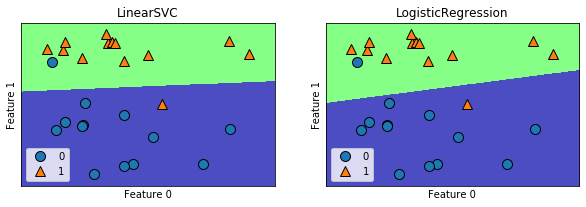

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_classification(clf, X, fill=False, eps=0.5, 
                                        ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    ax.legend()

For ```LogisticRegression``` and ```LinearSVC``` the trade-off parameter that determines the strength of the regularization is called C, and *higher* values of C correspond to *less* regularization

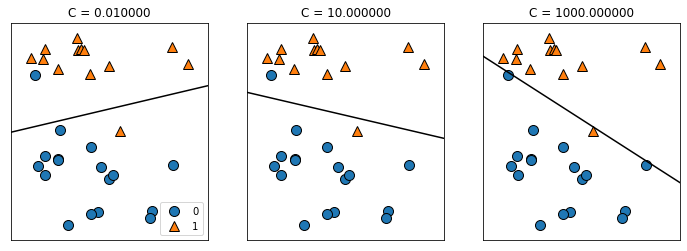

In [70]:
mglearn.plots.plot_linear_svc_regularization()

Similarly to the case of regression, linear models for classification might seem very
restrictive in low-dimensional spaces, only allowing for decision boundaries that are
straight lines or planes. Again, in high dimensions, linear models for classification
become very powerful, and guarding against overfitting becomes increasingly impor‐
tant when considering more features.

In [71]:
from sklearn.datasets import load_breast_cancer

In [72]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As training and test set performance are very close, it is likely that we are underfitting.

Increase C to fit a more flexible model

In [73]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


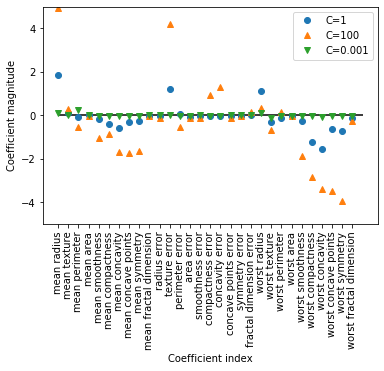

In [75]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


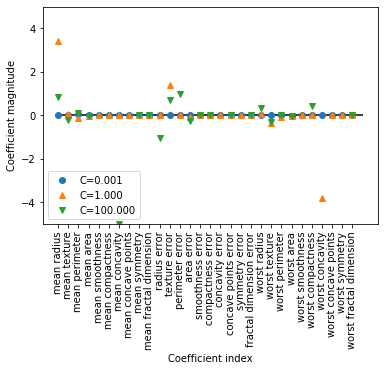

In [76]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

#### Linear models for multiclass classification

Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case (with the exception of logistic regression). A common
technique to extend a binary classification algorithm to a multiclass classification
algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is
learned for each class that tries to separate that class from all of the other classes,
resulting in as many binary models as there are classes. To make a prediction, all
binary classifiers are run on a test point. The classifier that has the highest score on its
single class “wins,” and this class label is returned as the prediction.

In [77]:
from sklearn.datasets import make_blobs

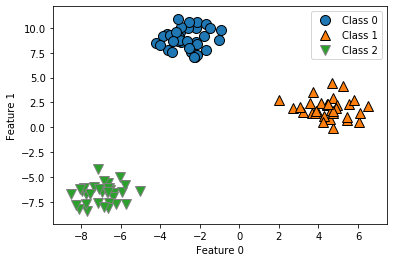

In [78]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [79]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


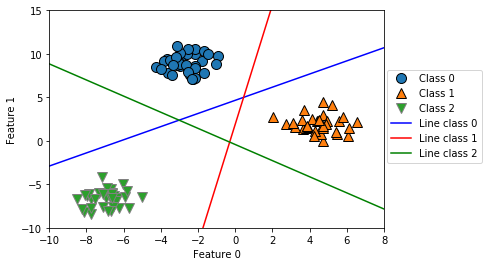

In [80]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

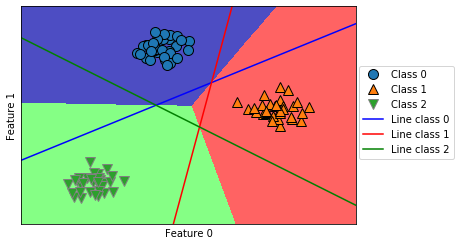

In [81]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                    ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
                            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses, and parameters

The main parameter of linear models is the regularization parameter, called ```alpha``` in the regression models and ```C``` in ```LinearSVC``` and ```LogisticRegression```. 

Large values for ```alpha``` or small values for ```C``` mean simple models.

### Method Chaining

In [82]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Naive Bayes Classifiers

Naive Bayes classifiers are a family of classifiers that are quite similar to the linear models. They tend to be even faster in training. The price paid for this efficiency is that naive Bayes models often provide
generalization performance that is slightly worse than that of linear classifiers like
LogisticRegression and LinearSVC .

The reason that naive Bayes models are so efficient is that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature. There are three kinds of naive Bayes classifiers implemented in scikit-learn : ```GaussianNB``` , ```BernoulliNB``` , and ```MultinomialNB```. ```GaussianNB``` can be applied to any continuous data, while ```BernoulliNB``` assumes binary data and ```MultinomialNB``` assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). ```BernoulliNB``` and ```MultinomialNB``` are mostly used in text data classification.

The ```BernoulliNB``` classifier counts how often every feature of each class is not zero.
This is most easily understood with an example:

In [85]:
X = np.array([[0, 1, 0, 1],
            [1, 0, 1, 1],
            [0, 0, 0, 1],
            [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [86]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### Strengths, weaknesses, and parameters

```MutlinominalNB``` and ```BeroulliNB``` have a single parameter, ```alpha```, which controls model complexity. The way ```alpha``` works is that the algorithm adds to the data ```alpha``` many virual data points that have positive values for all the features

A large ```alpha``` means more smoothing, resulting in less complex models. 

```GaussianNB``` is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text. ```MultinomialNB``` usually performs better than ```BinaryNB```, particularly on datasets with a relatively large number of nonzero features.

The naive Bayes models are very fast to train and to predict, and the training procedure is easy to understand. The models works well with high-dimensional sparse data and are relatively robust to the parameters. Naive Bayes models are gread baseline models and are often used on v ery large datasets, where thaining even a linear model might take too long.

### Decision Trees

Decision trees learn a hierarchy of if/else questions, leading to a decision. 

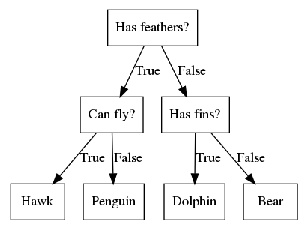

In [87]:
mglearn.plots.plot_animal_tree()

#### Controlling complexity of decision trees

Typically, building a tree continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data. 

There are two common stategies to prevent overfitting:

- stopping the creation of the tree early (also called pre-pruning)
- building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning).

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [90]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [91]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.944


In [92]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.951


In [93]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [94]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

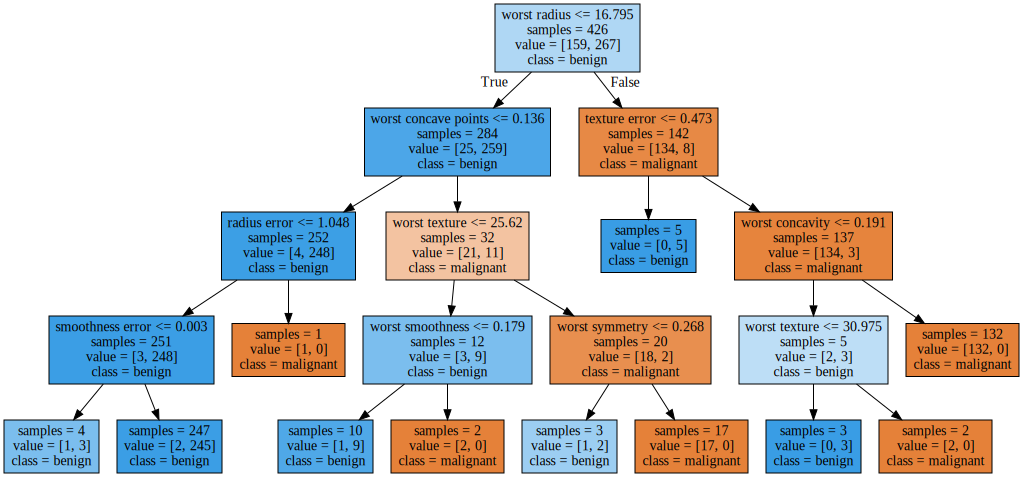

In [95]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### Feature importance in trees

Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree.

The most commonly used summary is *feature importance*, which rates how important each feature is for the decision a tree makes.[0;1] - interval

In [96]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [97]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

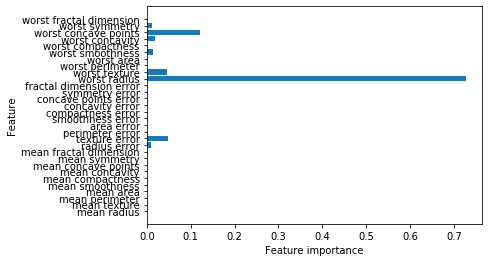

In [98]:
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


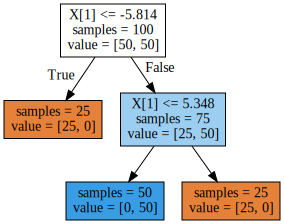

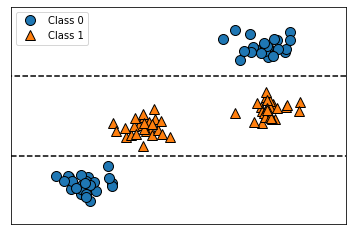

In [99]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [100]:
ram_prices = pd.read_csv("data/ram_price.csv")

Text(0, 0.5, 'Price in $/Mbyte')

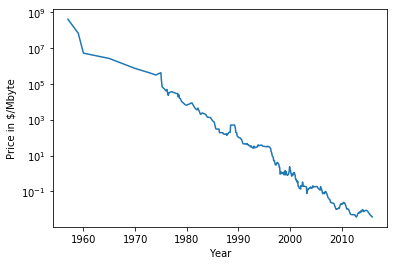

In [101]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [104]:
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

In [105]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [106]:
X_all = ram_prices.date[:, np.newaxis]

In [107]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [108]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

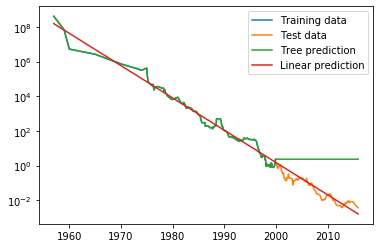

In [109]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

#### Strengths, weaknesses, and parameters

Picking one of the pre-pruning starategies - setting either ```max_depth```, ```max_leaf_nodes```, or ```min_samples_leaf``` - is sufficient to prevent overfitting

Decision treees have two advantages:
 
- the resulting model can easily be visualized and understood by nonexperts
- the algorithms are completely invariant to scaling of the data
- the possible splits of the data don't depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms.

### Ensebles of Decision Trees

*Ensebles* are methods that combine multiple machine learning models to create more powerful models.

There are two enseblee models that have wide range of datasets for classification and regression.
 
 - random forests
 - gradient boosted decision trees
 
 #### Random forests
 Random forests are one way to address problem of overfitting on the training data
 A random forest is essentially a collection of decision trees, where aach tree is slightly different from the others.
 The idea is that averaging multiple number of trees will reduce the amount of overfitting.
 
 To implement this strategy, we need to build many decision trees. Each tree should do
an acceptable job of predicting the target, and should also be different from the other
trees. Random forests get their name from injecting randomness into the tree build‐
ing to ensure each tree is different. There are two ways in which the trees in a random
forest are randomized: by selecting the data points used to build a tree and by select‐
ing the features in each split test. Let’s go into this process in more detail.

Steps of building random forests.
1. Take *bootstrap sample* of our data
This will create a dataset that is as big as the original dataset, but some data points will be missing from it (approximately one third), and some will be repeated.
2. A decision tree is built based on this dataset.
Instead of looking for the best test for each node, in each node the algorithm randomly selects a subset of the features, and it looks for the best possible test involving one of these features.


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [111]:
X, y = make_moons(n_samples=10, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [112]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

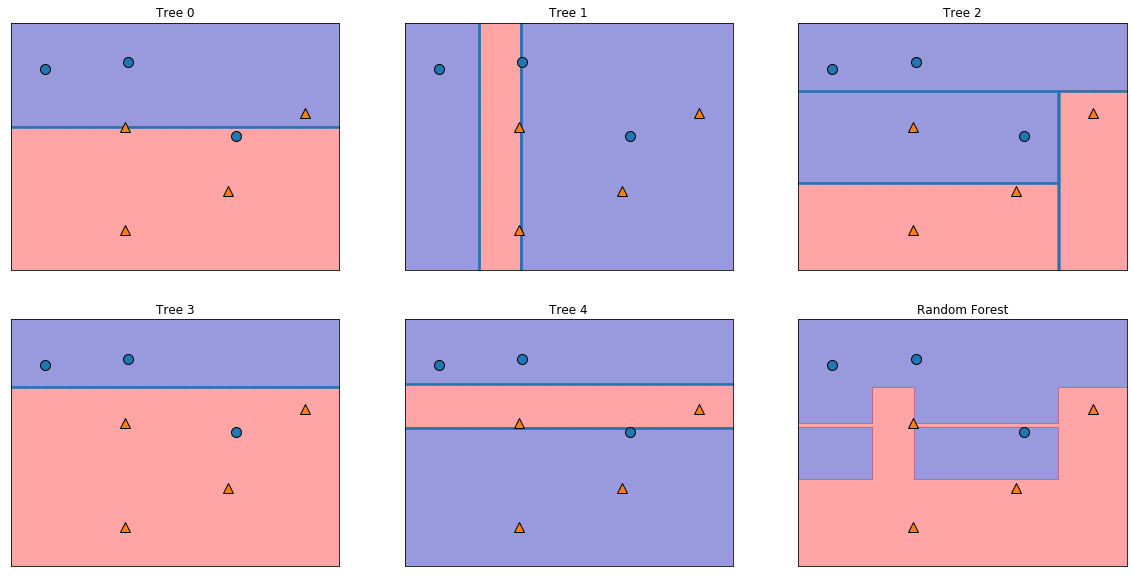

In [115]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

The random forest overfits less than any of the trees individually, and provides a much more intuitive decision boundary.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


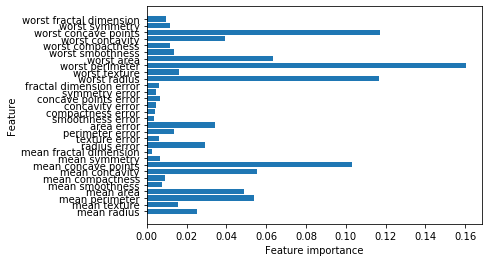

In [117]:
plot_feature_importances_cancer(forest)

##### Streangths, weaknesses, and parameters
if you need to summarize the prediction making in a visual way to nonexperts, a single decision tree might be a better choice. 
use the ```n_jobs``` parameter to adjust the number of cores to use.
```n_jobs = -1``` to use all the cores in computer
to have reproducible results, fix the ```random_state```
Random forests don’t tend to perform well on very high dimensional, sparse data,
such as text data. For this kind of data, linear models might be more appropriate.
Random forests usually work well even on very large datasets, and training can easily
be parallelized over many CPU cores within a powerful computer.
The important parameters to adjust are ```n_estimators``` , ```max_features``` , and possibly pre-pruning options like ```max_depth```.

For ```n_estimators```, larger is always better.
smaller ```max_features``` reduces overfitting.

A good rule of thumb - ```max_features=sqrt(n_features)``` for classification and
```max_features=log2(n_features)``` for regression

Adding ```max_features``` or ```max_leaf_nodes``` might sometimes improve preformance.